In [1]:
##Impoting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
#import dataset
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2292,5,152.875,2,81.00,46,2295.182143,0.004082,0.014874,21.024816,0.2,May,3,2,4,1,Returning_Visitor,False,False
8937,1,107.000,5,143.75,2,17.000000,0.025000,0.050000,0.000000,0.0,Dec,3,2,3,1,Returning_Visitor,False,False
167,0,0.000,0,0.00,5,125.000000,0.086667,0.166667,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
7654,1,76.600,2,23.20,46,4598.433333,0.004255,0.046809,10.724493,0.0,Jul,2,2,1,1,Returning_Visitor,False,True
8907,7,111.000,2,5.00,131,5396.264881,0.003929,0.013641,7.513426,0.0,Nov,2,1,1,2,Returning_Visitor,False,True


***EXPLORATORY DATA ANALYSIS***

In [11]:

#General dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [5]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
# change data type
df = df.astype({'OperatingSystems': object, 'Browser': object, 'Region': object, 'TrafficType': object})

numericals   = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 
                'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']
categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
timestamps   = ['Month']

**STATISTICS SUMMARY**

In [10]:

# numerical features

df[numericals].describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Skewness:

All features (columns) are positive skew.
There are several summary values that need to be marked:

Q1, Q2, Q3 for Informational, Informational_Duration, and SpecialDay worth 0.
The maximum value for PageValues is very large, indicating an outlier.

In [8]:

# categorical features
df[categoricals].describe()

,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330
unique,8,13,9,20,3,2,2
top,2,2,1,2,Returning_Visitor,False,False
freq,6601,7961,4780,3913,10551,9462,10422


In [9]:

# timestamp feature distribution
for col in timestamps:
    print(f'value count kolom {col}:')
    print(df[col].value_counts())
    print()

value count kolom Month:
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64



**FEATURE DISTRIBUTION FOR EACH REVENUE VALUE**

NUMERICAL FEATURES

**Boxplot**

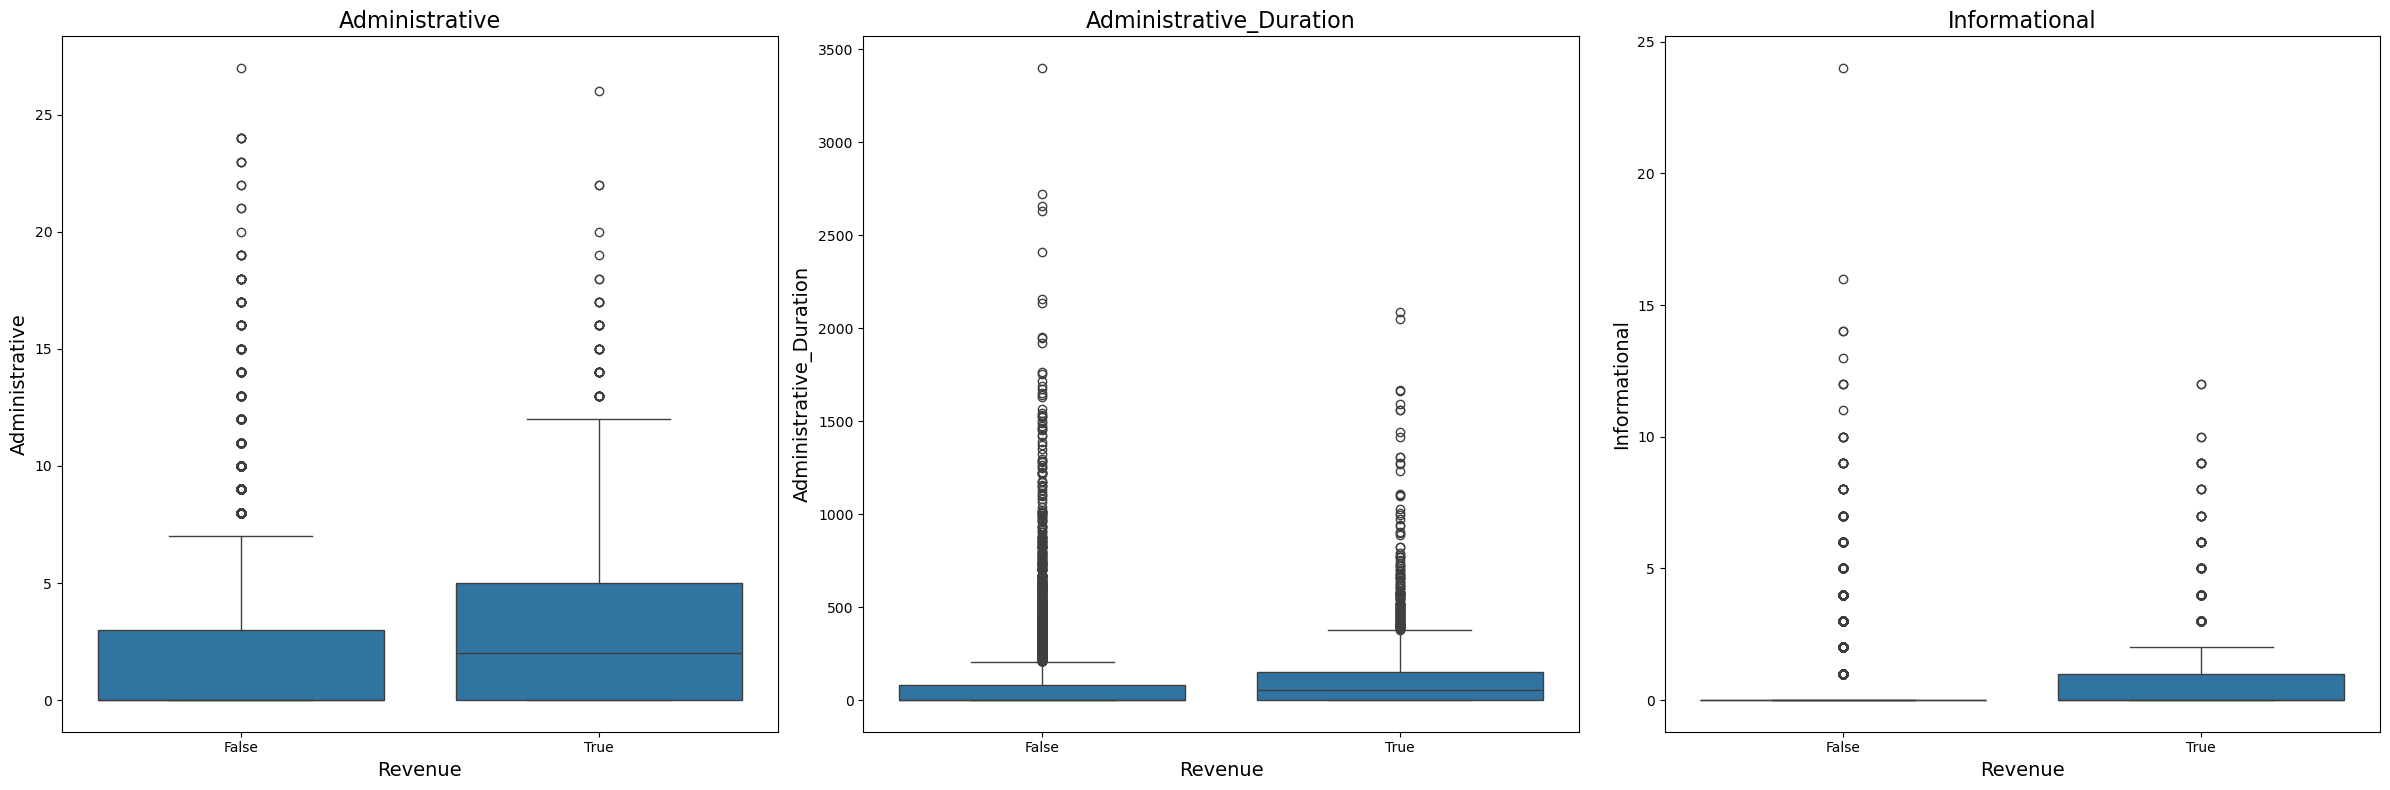

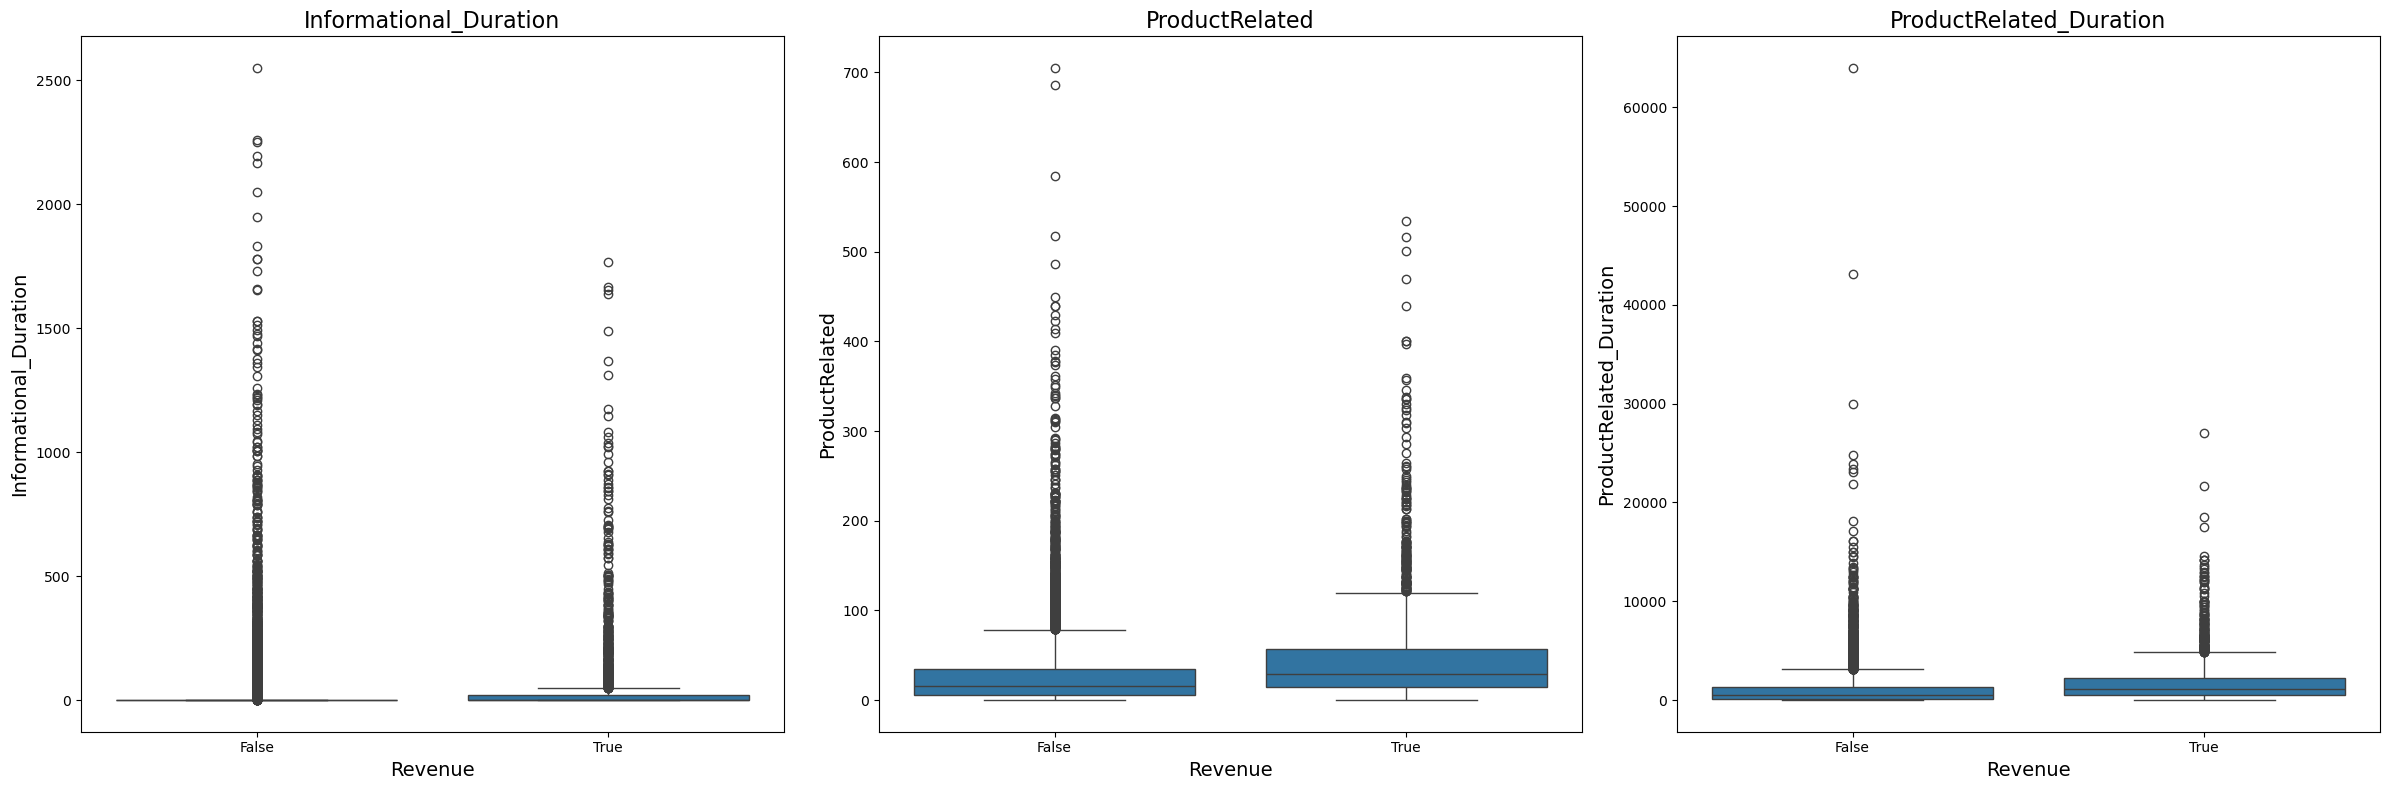

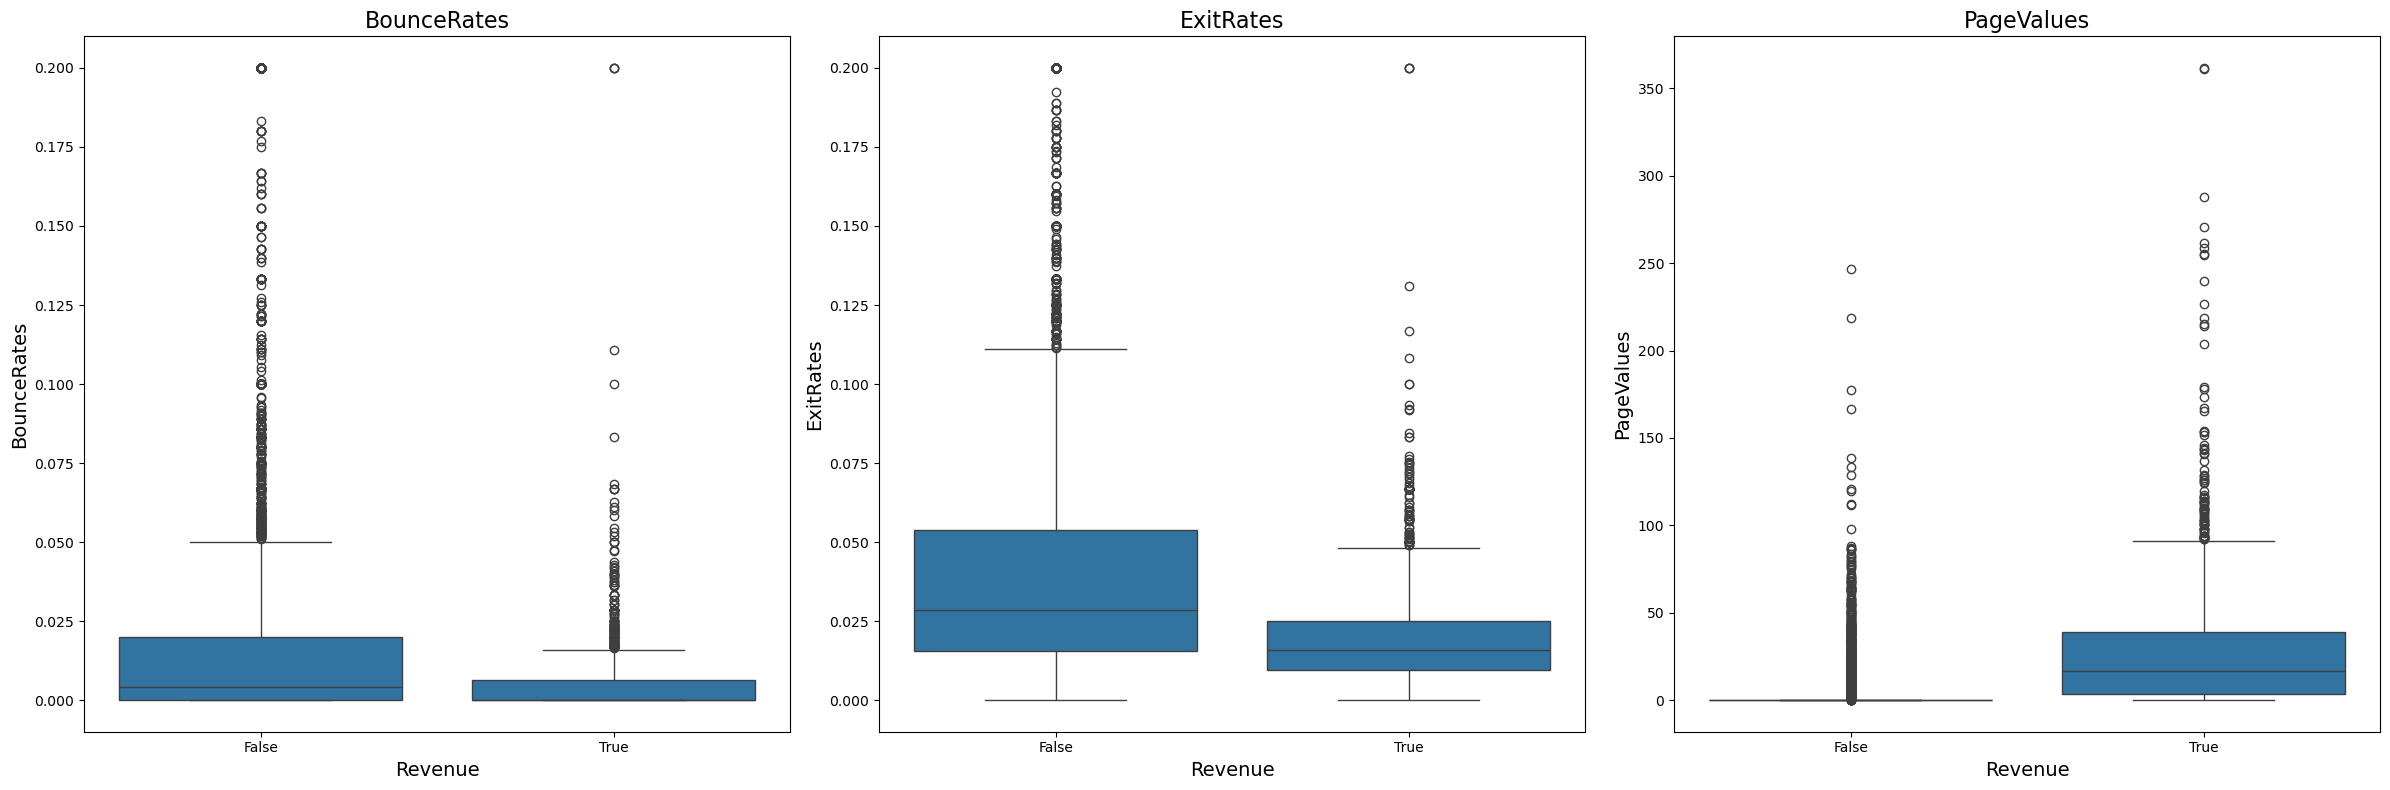

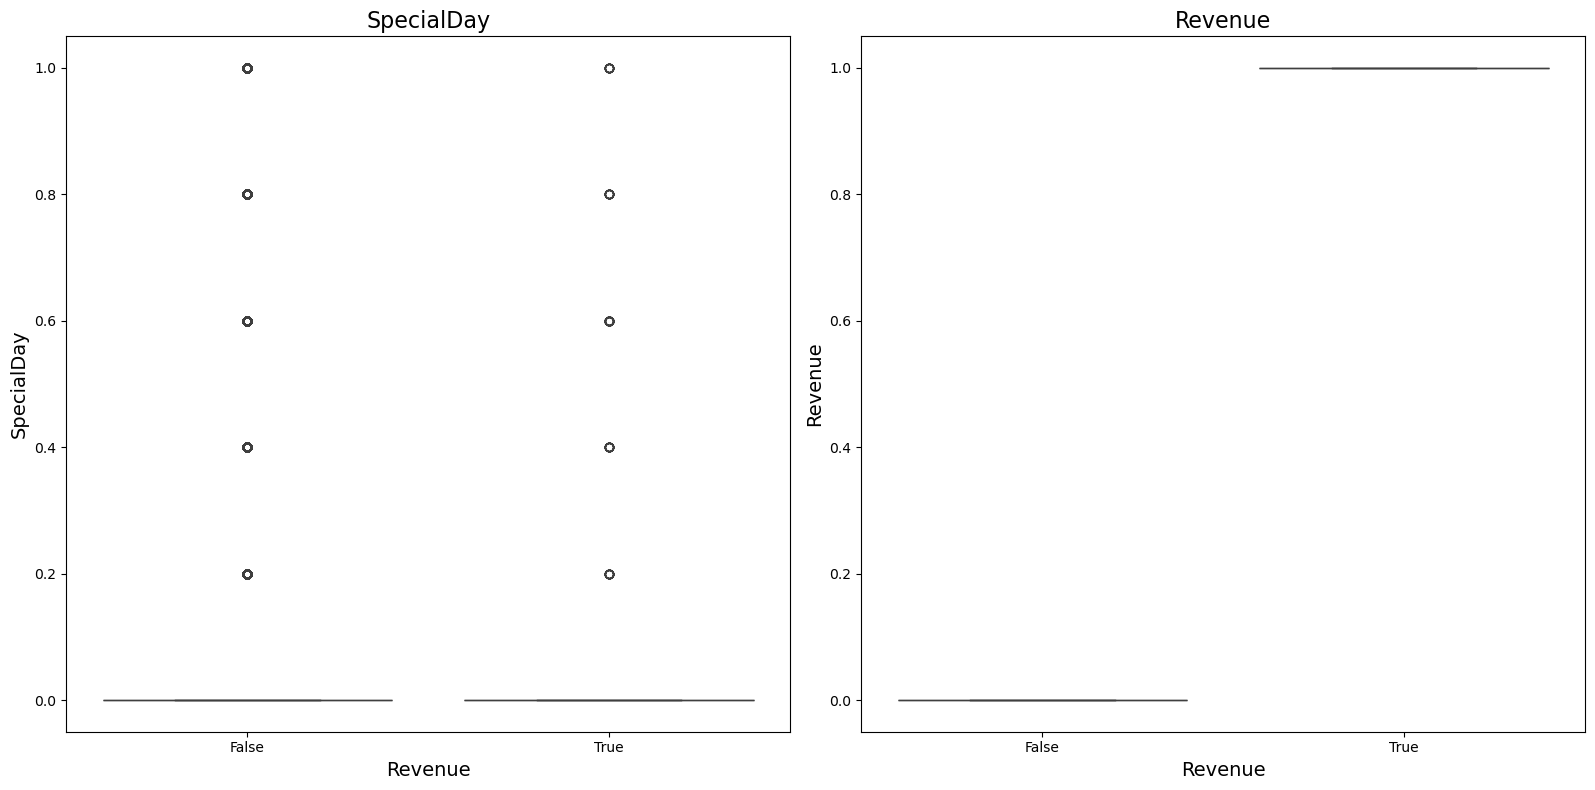

In [22]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# Set large figure size for 3 plots side by side
rcParams['figure.figsize'] = (24, 8)  # Width x Height

# Loop through numerical features 3 at a time
for i in range(0, len(numericals), 3):
    plt.figure(figsize=(24, 8))  # Create a new figure for each 3 plots

    # First plot
    plt.subplot(1, 3, 1)
    sns.boxplot(x=df['Revenue'], y=df[numericals[i]])
    plt.title(numericals[i], fontsize=16)
    plt.xlabel('Revenue', fontsize=14)
    plt.ylabel(numericals[i], fontsize=14)

    # Second plot
    if i + 1 < len(numericals):
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df['Revenue'], y=df[numericals[i + 1]])
        plt.title(numericals[i + 1], fontsize=16)
        plt.xlabel('Revenue', fontsize=14)
        plt.ylabel(numericals[i + 1], fontsize=14)

    # Third plot
    if i + 2 < len(numericals):
        plt.subplot(1, 3, 3)
        sns.boxplot(x=df['Revenue'], y=df[numericals[i + 2]])
        plt.title(numericals[i + 2], fontsize=16)
        plt.xlabel('Revenue', fontsize=14)
        plt.ylabel(numericals[i + 2], fontsize=14)

    plt.tight_layout()
    plt.show()


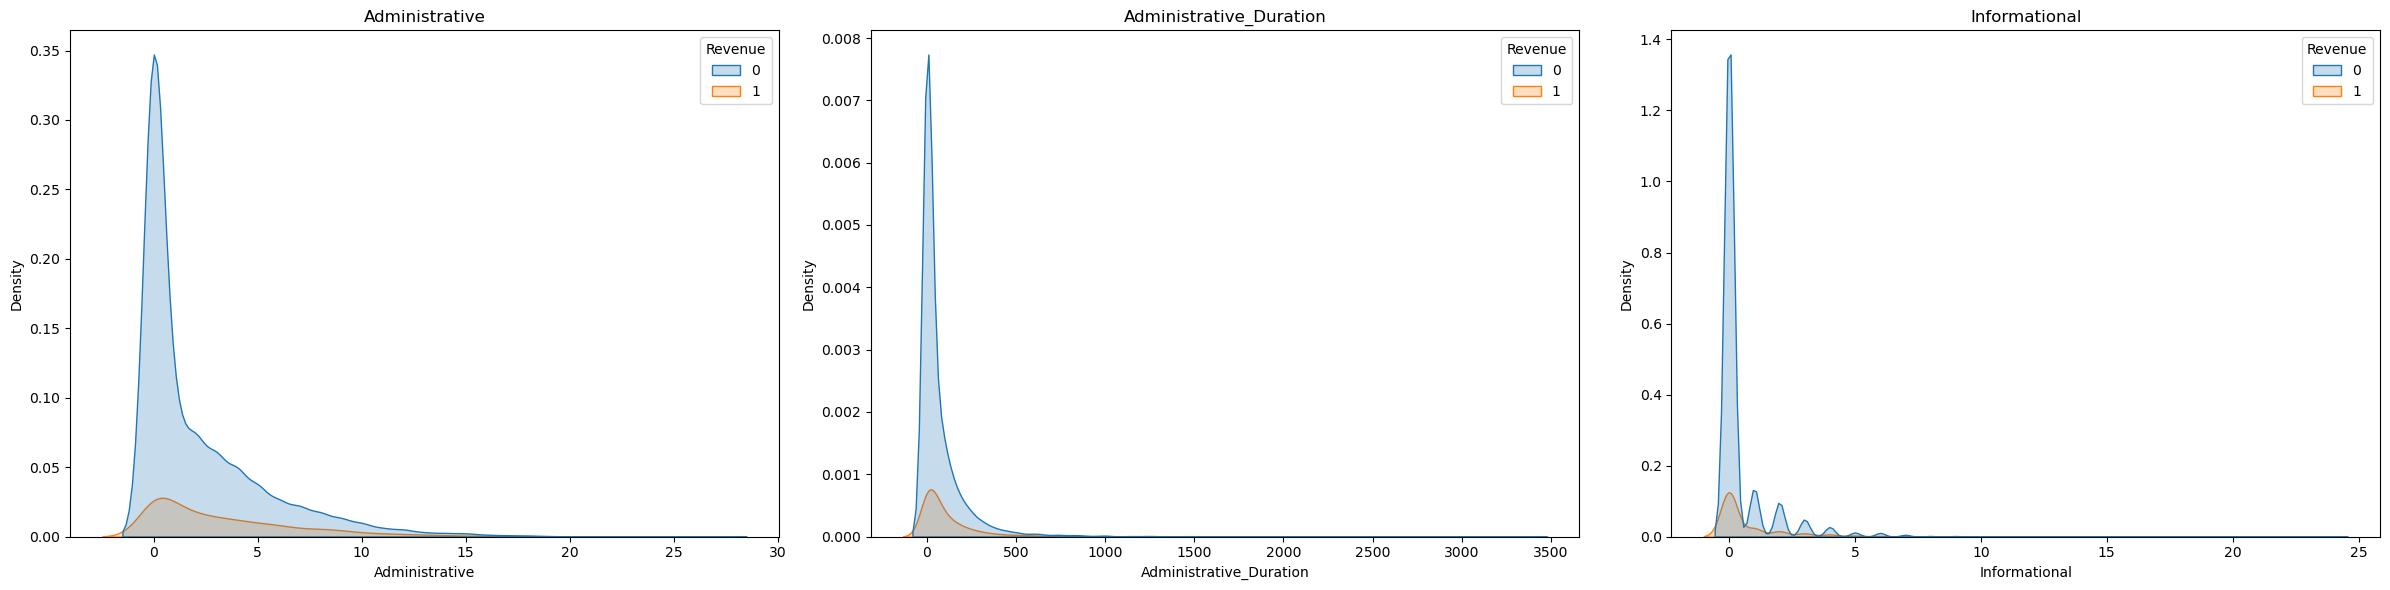

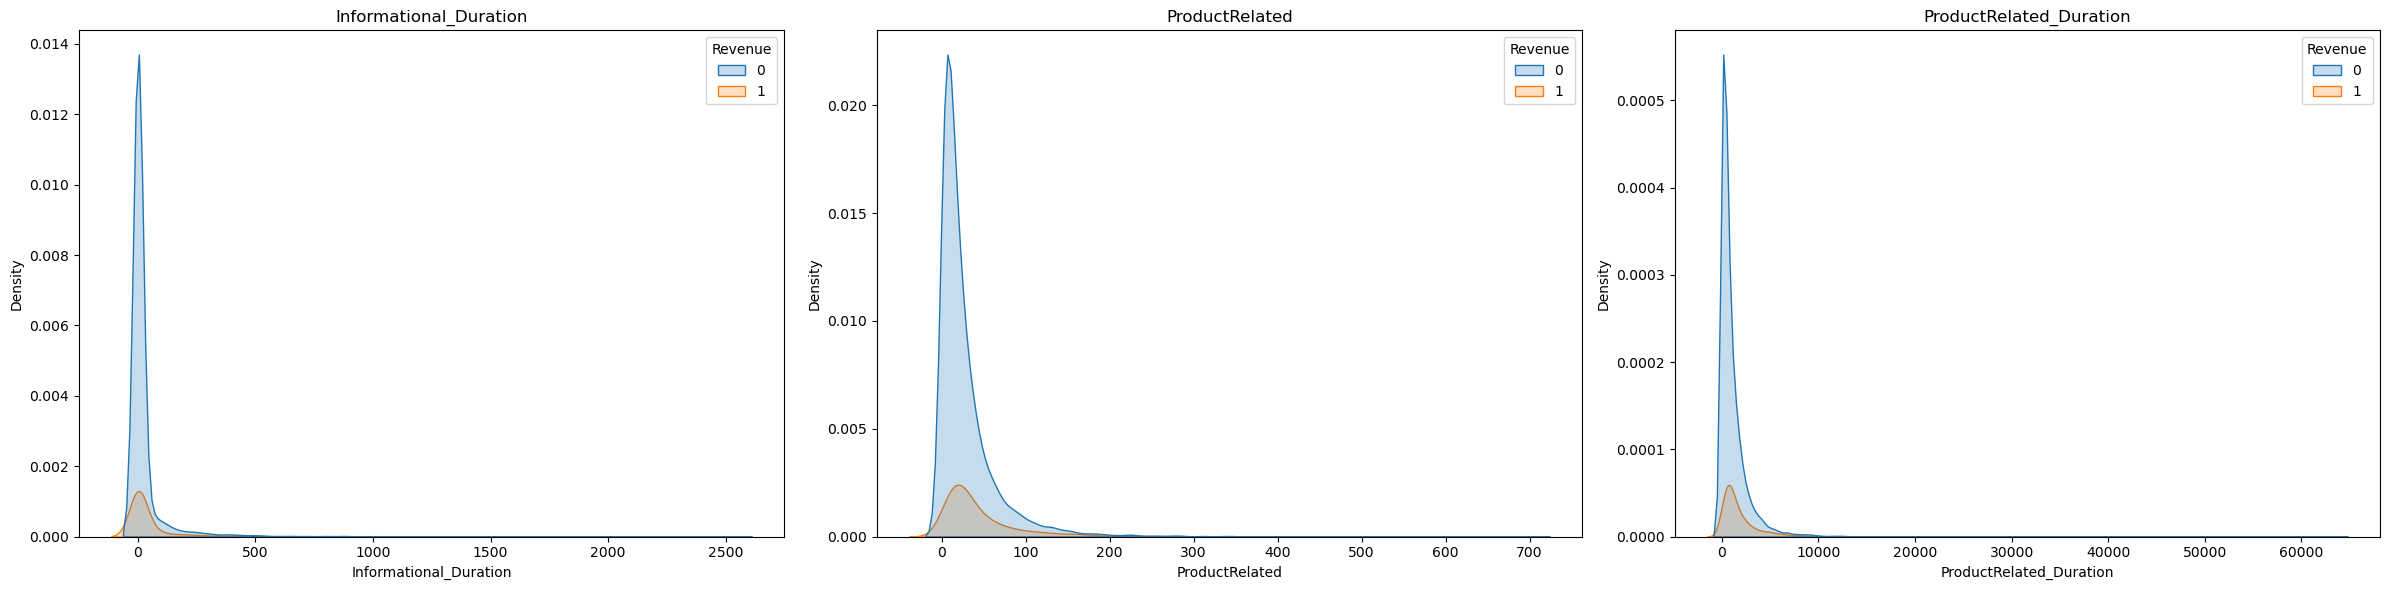

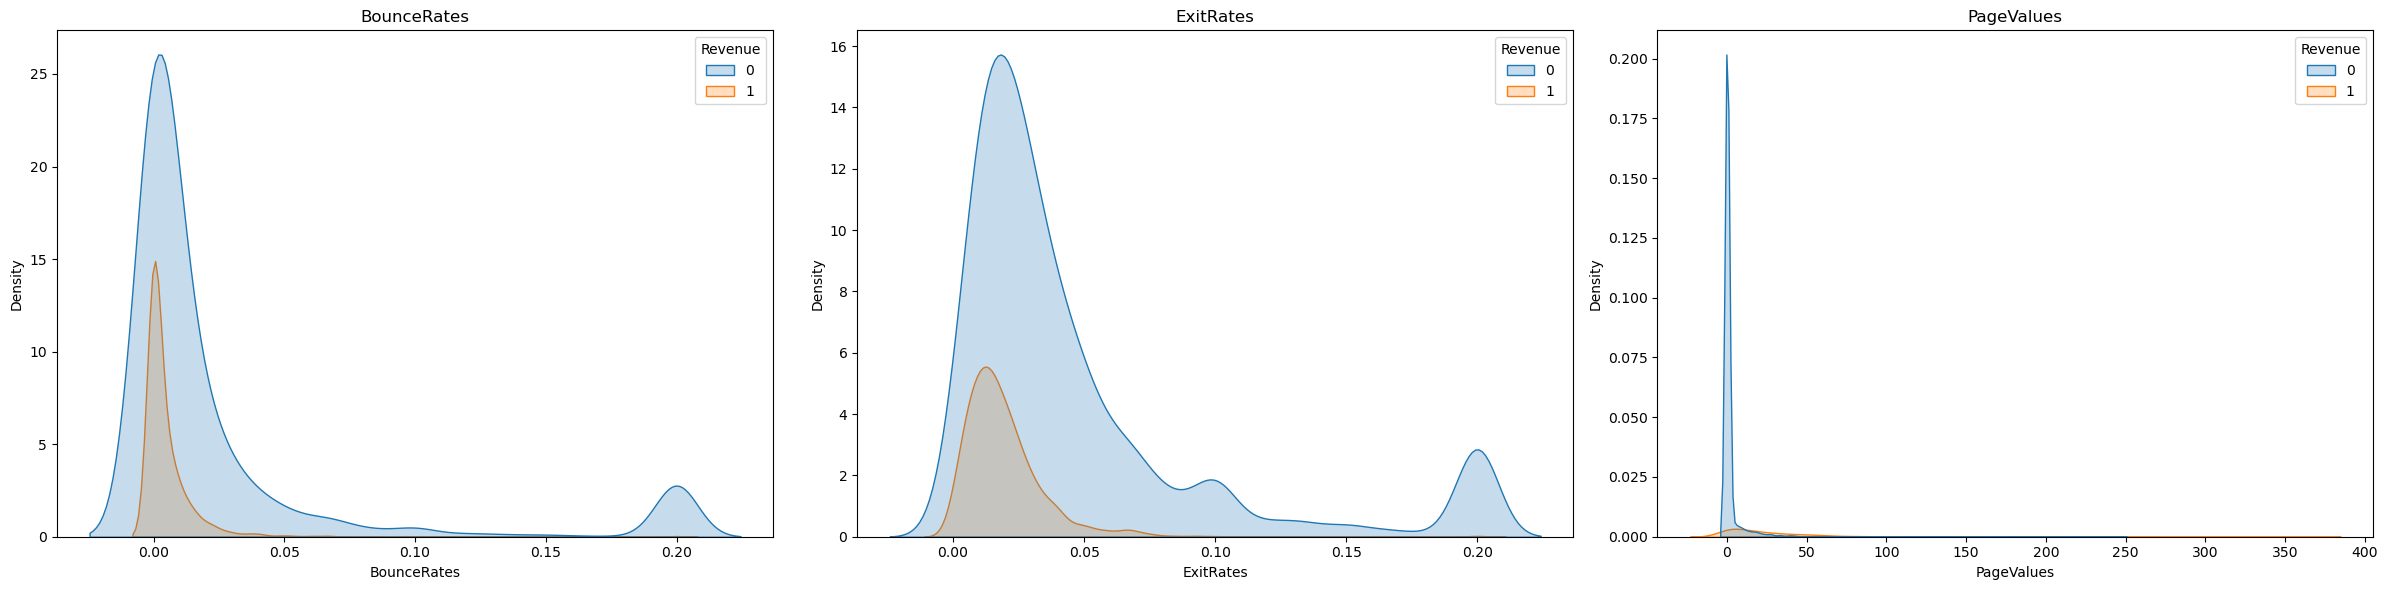

Skipping 'Revenue' due to 0 variance in both Revenue groups.


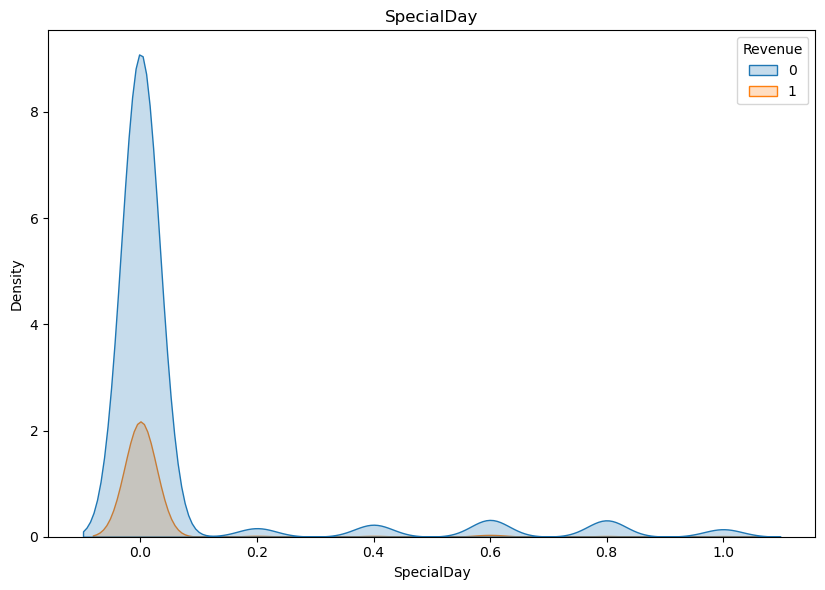

In [30]:

# displot for numerical features
for i in range(0, len(numericals), 3):
    plt.figure(figsize=(24, 6))

    for j in range(3):
        if i + j < len(numericals):
            feature = numericals[i + j]

            # Variance check for both Revenue groups
            group1 = df[df['Revenue'] == True][feature]
            group2 = df[df['Revenue'] == False][feature]

            if group1.nunique() > 1 or group2.nunique() > 1:
                plt.subplot(1, 3, j + 1)
                sns.kdeplot(x=df[feature], hue=df['Revenue'], fill=True)
                plt.title(feature)
                plt.xlabel(feature)
            else:
                print(f"Skipping '{feature}' due to 0 variance in both Revenue groups.")

    plt.tight_layout()
    plt.show()


***CORRELATION HEATMAP***

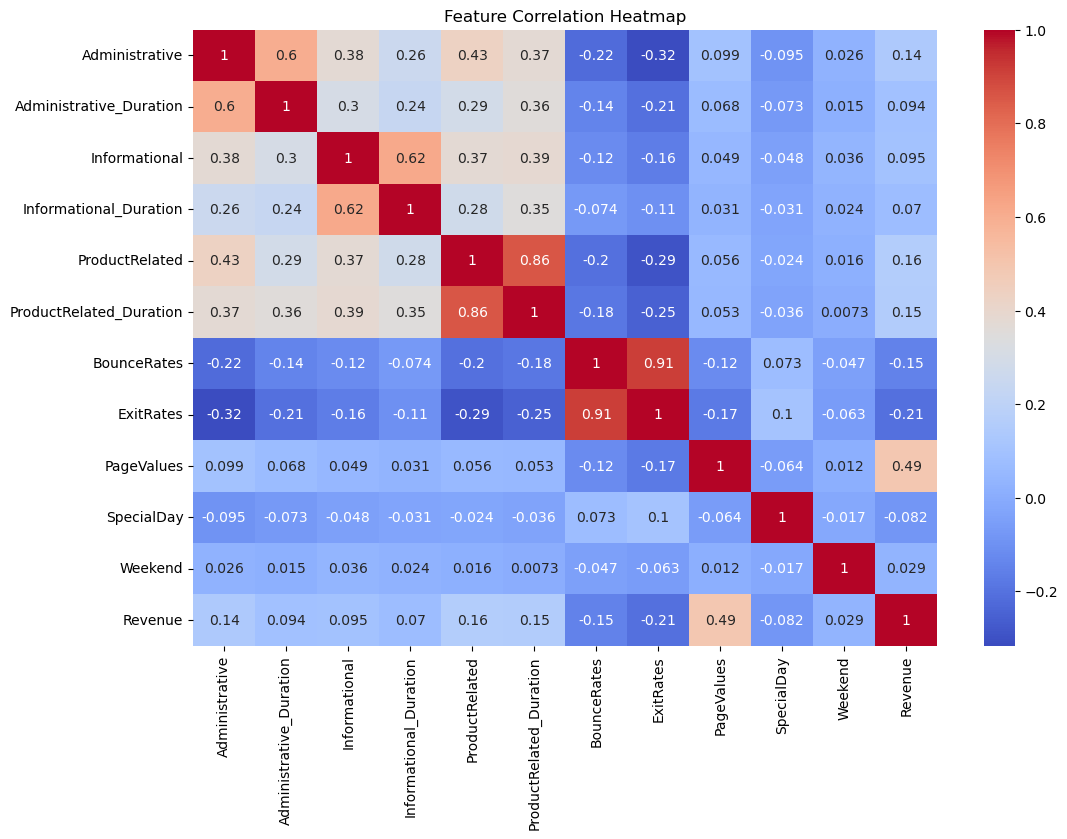

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

**Relationship of PageValues and ExitRates with Purchase Conversion Rate**

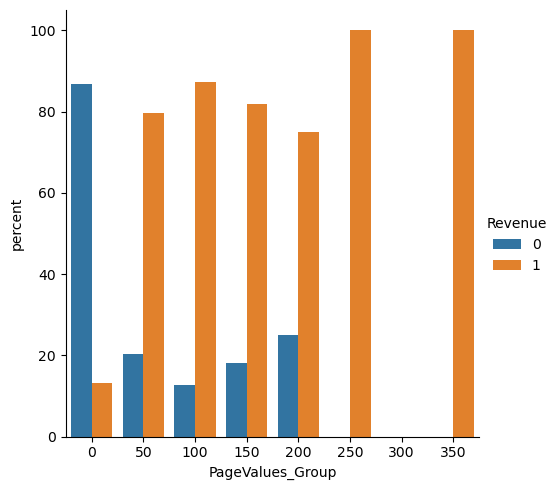

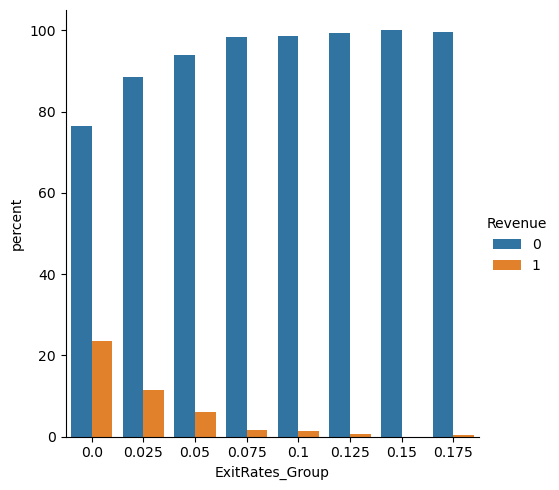

In [46]:
# (a) PageValues
x, y = 'PageValues_Group', 'Revenue'

(
    df.groupby(x, observed=True)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe(sns.catplot, x=x, y='percent', hue=y, kind='bar')
)
plt.show()

# (b) ExitRates
x, y = 'ExitRates_Group', 'Revenue'

(
    df.groupby(x, observed=True)[y]
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pipe(sns.catplot, x=x, y='percent', hue=y, kind='bar')
)
plt.show()


**Caterorical features***


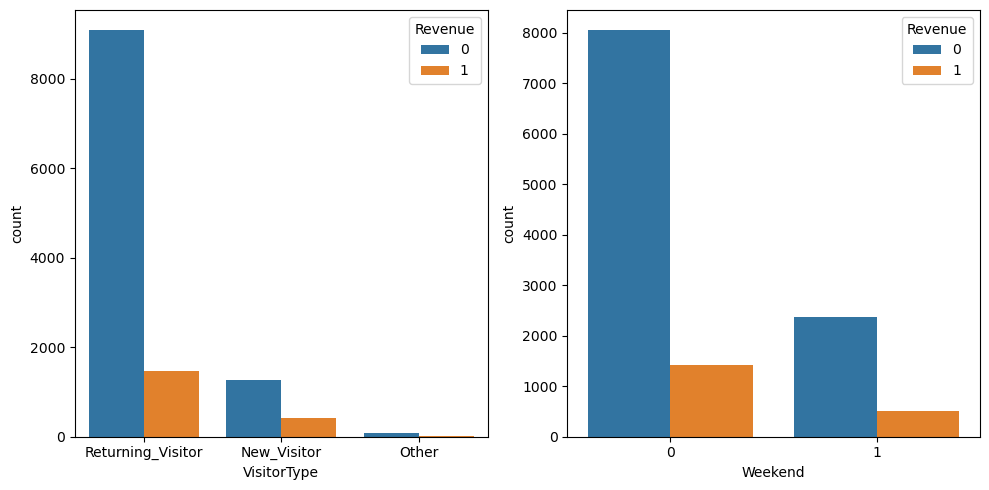

In [47]:
# the number of users who made purchases and not for any other features
others_bool = ['VisitorType', 'Weekend']

rcParams['figure.figsize'] = 10, 5
for i in range(0, len(others_bool)):
    plt.subplot (1, 2, i+1)
    sns.countplot(data = df, x = others_bool[i], hue = 'Revenue')
    plt.tight_layout()

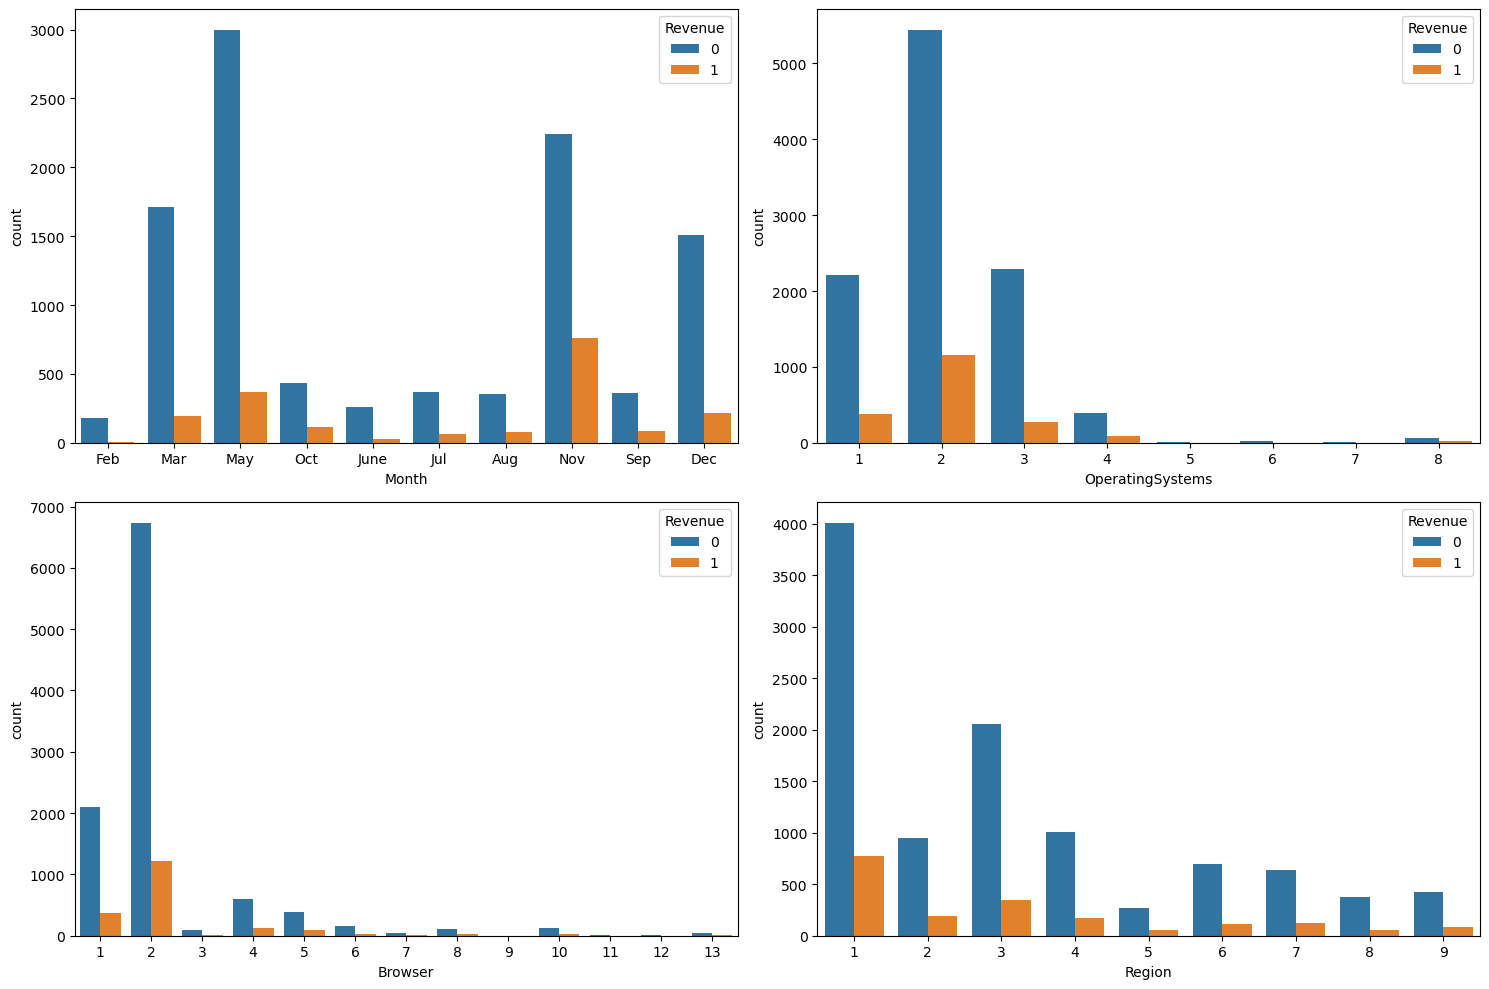

In [48]:

# the number of users who made purchases and not for any other features
others = ['Month', 'OperatingSystems', 'Browser', 'Region']

rcParams['figure.figsize'] = 15, 10
for i in range(0, len(others)):
    plt.subplot (2, 2, i+1)
    sns.countplot(data = df, x = others[i], hue = 'Revenue')
    plt.tight_layout()
     

The majority of customers who make purchases are:

Visitor Type: Returning Visitor

Weekends: False

Month: Nov

Operating Systems: 2

Browsers: 2

Regions: 1

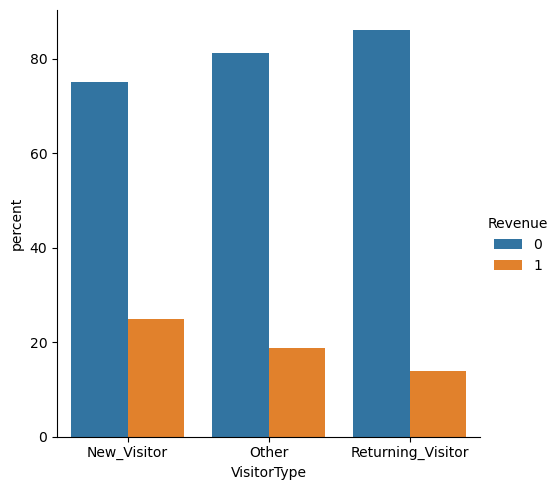

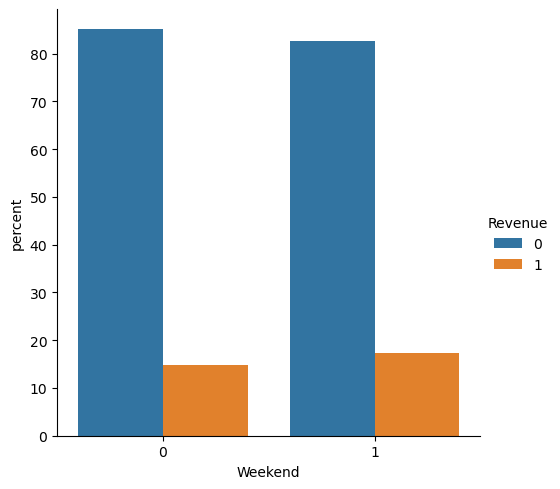

In [49]:
# percentage for each revenue value
rcParams['figure.figsize'] = 12, 10
for x in ['VisitorType', 'Weekend']:
  (df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
  plt.show()
     

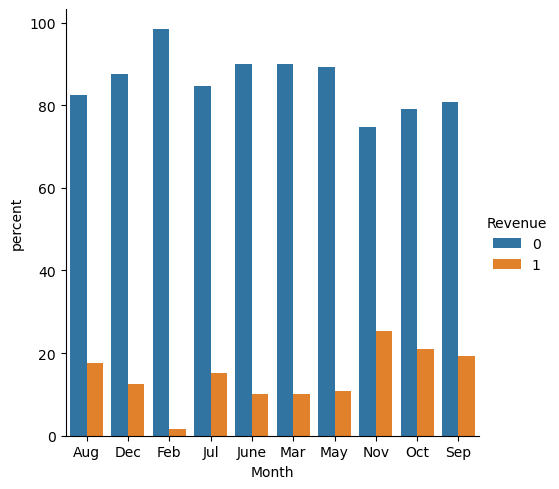

In [50]:

x = 'Month'
(df.groupby(x)[y].value_counts(normalize = True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar'))
plt.show()

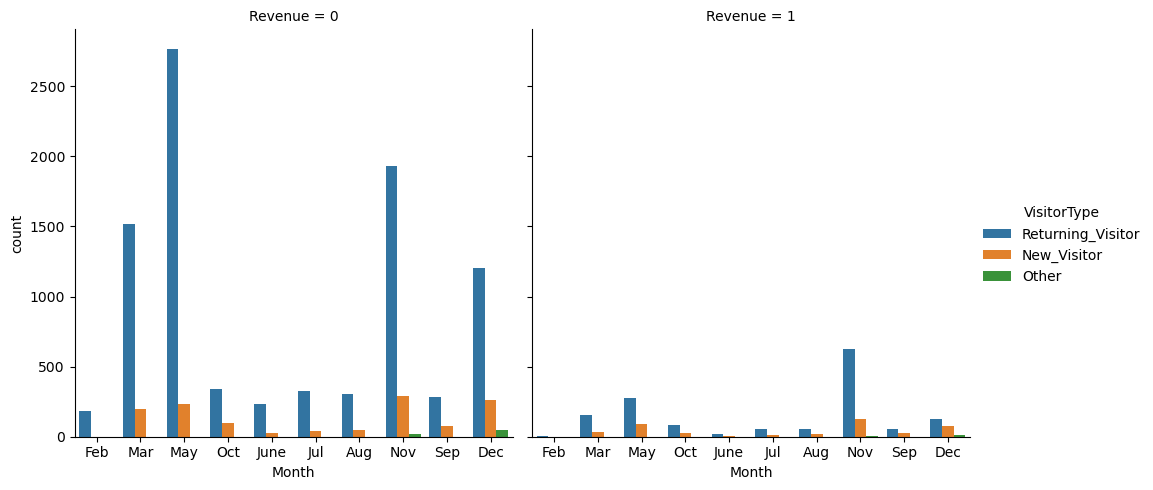

In [51]:

# distribution of users who come every month based on the Visitor Type
rcParams['figure.figsize'] = 15, 15
sns.catplot(data = df, x = 'Month', hue = 'VisitorType', kind = 'count', col = 'Revenue')

Users who made the most purchases were ReturningVisitors in November, then followed in May.

Users who make the most visits are ReturningVisitors in May followed by March, November and December


**HYPOTHESIS TEST**

H0: Feature categoricals [i] and independent revenue.

H1: feature categoricals [i] and dependent revenue.

In [52]:

import scipy.stats as st
from scipy.stats import chi2_contingency

In [54]:
from scipy.stats import chi2_contingency
import pandas as pd

def uji_hipotesis(df, feature):
    # Create a contingency table
    table = pd.crosstab(df[feature], df['Revenue'])

    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(table)

    print(f'Feature: {feature}')
    print(f'p-value: {p_value:.4f}')

    # Interpret the result
    if p_value > 0.05:
        print(f'✅ Accept H0: "{feature}" is independent of Revenue\n')
    else:
        print(f'❌ Reject H0: "{feature}" is dependent on Revenue\n')


In [55]:
for feature in categoricals:
    print(f'Uji hipotesis {feature} - Revenue')
    uji_hipotesis(df, feature)
    print('')

print('Uji hipotesis Month - Revenue')
uji_hipotesis(df, 'Month')
print('')


Uji hipotesis OperatingSystems - Revenue
Feature: OperatingSystems
p-value: 0.0000
❌ Reject H0: "OperatingSystems" is dependent on Revenue


Uji hipotesis Browser - Revenue
Feature: Browser
p-value: 0.0061
❌ Reject H0: "Browser" is dependent on Revenue


Uji hipotesis Region - Revenue
Feature: Region
p-value: 0.3214
✅ Accept H0: "Region" is independent of Revenue


Uji hipotesis TrafficType - Revenue
Feature: TrafficType
p-value: 0.0000
❌ Reject H0: "TrafficType" is dependent on Revenue


Uji hipotesis VisitorType - Revenue
Feature: VisitorType
p-value: 0.0000
❌ Reject H0: "VisitorType" is dependent on Revenue


Uji hipotesis Weekend - Revenue
Feature: Weekend
p-value: 0.0013
❌ Reject H0: "Weekend" is dependent on Revenue


Uji hipotesis Revenue - Revenue
Feature: Revenue
p-value: 0.0000
❌ Reject H0: "Revenue" is dependent on Revenue


Uji hipotesis Month - Revenue
Feature: Month
p-value: 0.0000
❌ Reject H0: "Month" is dependent on Revenue




**DATA CLEANING**

Duplicated data

In [60]:
df = pd.read_csv("online_shoppers_intention.csv")
df_cleaned = df.drop_duplicates()

drop_percent = round(((len(df) - len(df_cleaned)) / len(df)) * 100, 2)
print(f'Duplicate data drop percentage: {drop_percent}%')


Duplicate data drop percentage: 1.01%


**HANDLING OUTLIERS**

***Outlier check***

In [62]:
# IQR function 
def IQR(x):
  x = x.astype(np.float32)
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  
  bb = q1 - 1.5*(q3 - q1)
  ba = q3 + 1.5*(q3 - q1)

  outlier_indices = list(x.index[(x < bb) | (x > ba)])
  outlier_values = list(x[outlier_indices])

  return len(outlier_indices)

In [63]:
# IQR Method
for i in numericals:
  print(f'Number of IQR outliers {i}: {IQR(df[i])}')

Number of IQR outliers Administrative: 404
Number of IQR outliers Administrative_Duration: 1172
Number of IQR outliers Informational: 2631
Number of IQR outliers Informational_Duration: 2405
Number of IQR outliers ProductRelated: 987
Number of IQR outliers ProductRelated_Duration: 961
Number of IQR outliers BounceRates: 1551
Number of IQR outliers ExitRates: 1099
Number of IQR outliers PageValues: 2730
Number of IQR outliers SpecialDay: 1251
Number of IQR outliers Revenue: 1908


**Label Encoding**

In [6]:
import pandas as pd

df = pd.read_csv("online_shoppers_intention.csv")  
from sklearn.preprocessing import LabelEncoder

df['Revenue'] = LabelEncoder().fit_transform(df['Revenue'])
df['Weekend'] = LabelEncoder().fit_transform(df['Weekend'])


In [7]:

# label encoding for Month
mapping_month = {'Jan' : 1, 'Feb' : 2,
                 'Mar' : 3, 'Apr' : 4,
                 'May' : 5, 'June' : 6,
                 'Jul' : 7, 'Aug' : 8,
                 'Sep' : 9, 'Oct' : 10,
                 'Nov' : 11, 'Dec' : 12}

df['Month'] = df['Month'].map(mapping_month)

In [12]:

# change feature VisitorType to feature dummies with VT prefix
onehot = pd.get_dummies(df['VisitorType'], prefix = 'VT')
df = df.join(onehot)

# drop feature VisitorType
df = df.drop(['VisitorType'], axis = 1)
     

In [13]:

# save the processed data into the df_processed dataset
df_cleaned = df.copy()
df_cleaned.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Text(0.5, 1.0, 'Data Correlation')

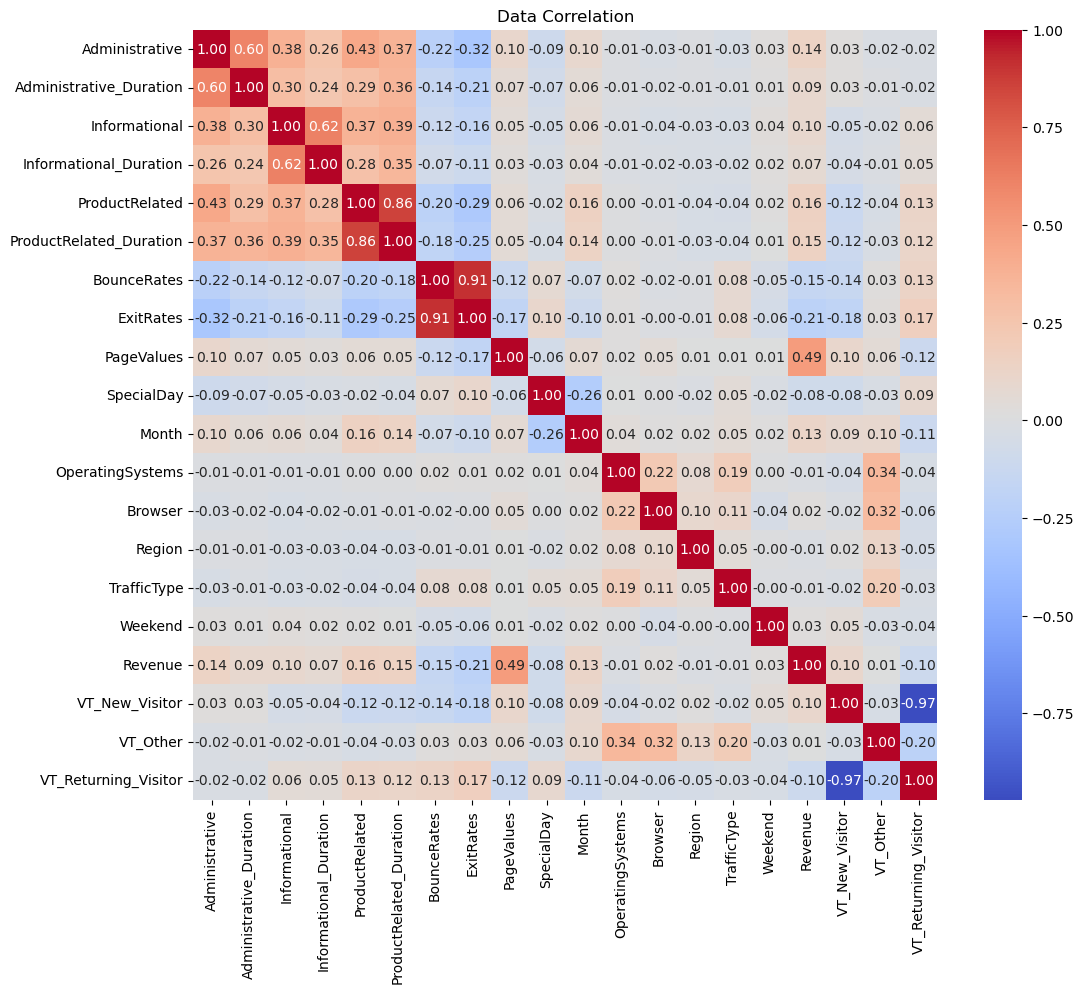

In [15]:
# numeric correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df_cleaned.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

Features with a correlation value > 0.80:

ExitRates - BounceRates (0.90) redundant >> drop one

VT_Returning_Visitor - VT_New_Visitor (0.97) >> drop one

ProductRelated - ProductRelated_Duration (0.86) >> feature transformation

**FEATURE SELECTION**

In [17]:

df_selected = df_cleaned.drop(['BounceRates', 'VT_Returning_Visitor', 'Region'], axis=1)
df_selected.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other
0,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,1,1,1,0,0,False,False
1,0,0.0,0,0.0,2,64.000000,0.10,0.0,0.0,2,2,2,2,0,0,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.0,0.0,2,4,1,3,0,0,False,False
3,0,0.0,0,0.0,2,2.666667,0.14,0.0,0.0,2,3,2,4,0,0,False,False
4,0,0.0,0,0.0,10,627.500000,0.05,0.0,0.0,2,3,3,4,1,0,False,False


**FEATURE TRANSFORMATION**

Transformation of three data sets that have a high correlation related to page types into the average duration per page opened

In [19]:
df_selected['Administrative_Duration_Page'] = df_selected['Administrative_Duration']/df_selected['Administrative']
df_selected['Informational_Duration_Page'] = df_selected['Informational_Duration']/df_selected['Informational']
df_selected['ProductRelated_Duration_Page'] = df_selected['ProductRelated_Duration']/df_selected['ProductRelated']

df_transformed = df_selected.drop(['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'], axis=1)

# division by zero becomes zero
df_transformed['Administrative_Duration_Page'] = df_transformed['Administrative_Duration_Page'].fillna(0)
df_transformed['Informational_Duration_Page'] = df_transformed['Informational_Duration_Page'].fillna(0)
df_transformed['ProductRelated_Duration_Page'] = df_transformed['ProductRelated_Duration_Page'].fillna(0)
     

Text(0.5, 1.0, 'Data Correlation')

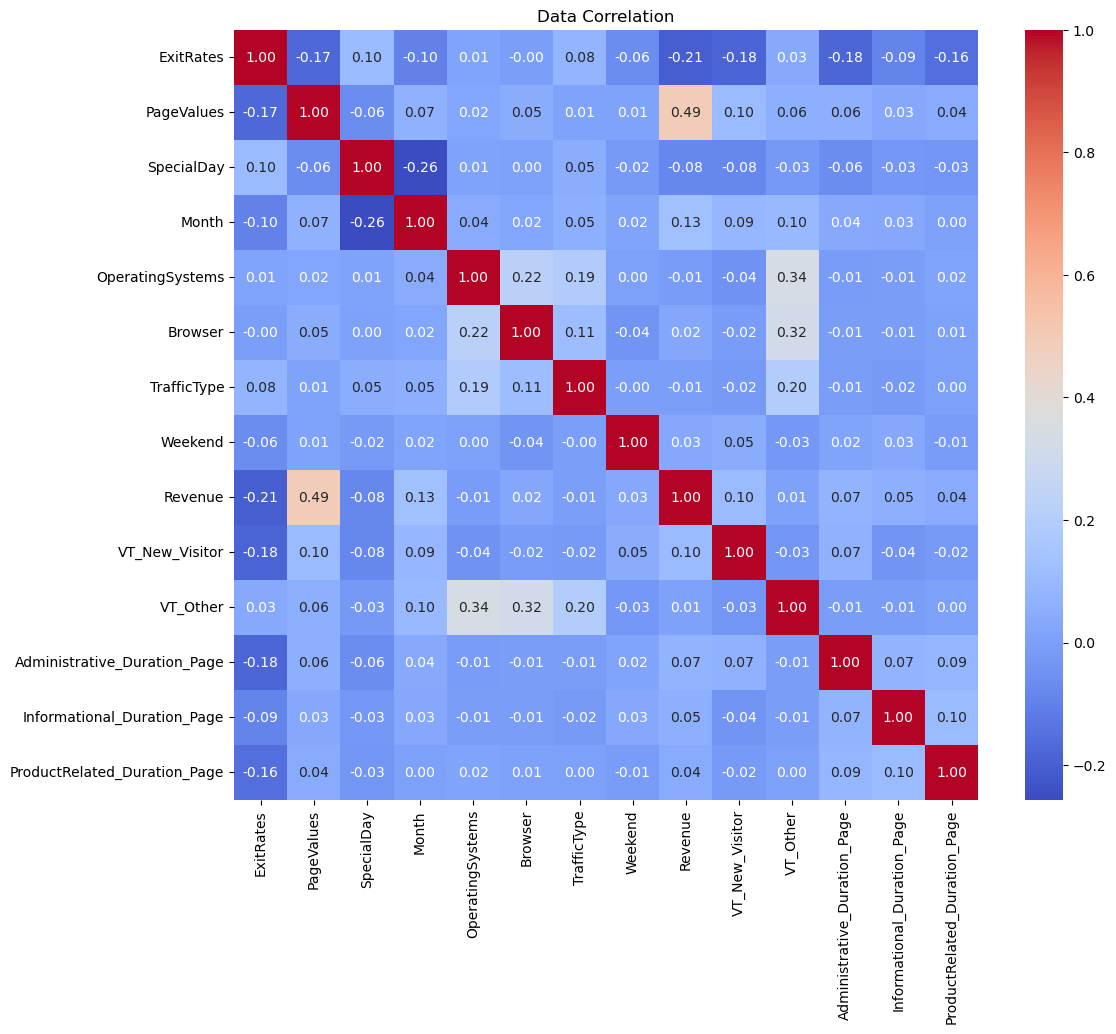

In [20]:

# numeric correlation
plt.figure(figsize=(12 , 10))
sns.heatmap(df_transformed.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')
plt.title('Data Correlation')

In [21]:

df_transformed.sample(5)

,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,Weekend,Revenue,VT_New_Visitor,VT_Other,Administrative_Duration_Page,Informational_Duration_Page,ProductRelated_Duration_Page
617,0.007143,0.000000,0.0,3,1,1,2,0,0,False,False,40.000000,0.0,51.870370
10927,0.031511,5.391767,0.0,11,2,2,1,0,1,False,False,56.804422,88.5,60.275301
6106,0.091667,0.000000,0.0,8,3,2,13,0,0,False,False,0.000000,0.0,11.650000
2164,0.009375,26.983125,0.0,5,3,2,4,0,1,True,False,12.785714,0.0,44.743590
5087,0.030000,0.000000,0.0,5,3,2,13,0,0,False,False,0.000000,24.0,79.666667


In [23]:

# drop categorical features
df_droped = df_transformed.drop(['OperatingSystems', 'Browser', 'TrafficType', 'Month'], axis=1)

In [24]:
# save the feature engineering result dataset into the dataset
data = df_droped.copy()

**MODEL EVALUATION**

Split data

In [26]:
# dataset check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ExitRates                     12330 non-null  float64
 1   PageValues                    12330 non-null  float64
 2   SpecialDay                    12330 non-null  float64
 3   Weekend                       12330 non-null  int64  
 4   Revenue                       12330 non-null  int64  
 5   VT_New_Visitor                12330 non-null  bool   
 6   VT_Other                      12330 non-null  bool   
 7   Administrative_Duration_Page  12330 non-null  float64
 8   Informational_Duration_Page   12330 non-null  float64
 9   ProductRelated_Duration_Page  12330 non-null  float64
dtypes: bool(2), float64(6), int64(2)
memory usage: 794.8 KB


In [27]:

X = data.drop(['Revenue'], axis = 1) # features
y = data['Revenue'] # target

from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Scaler Transformation**

In [29]:
# scaler transformation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# data train (X_train)
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_train = pd.DataFrame(X_train, columns = list(X.columns))

# data test (X_test)
X_test = scaler.transform(X_test_raw)
X_test = pd.DataFrame(X_test, columns = list(X.columns))

**Handling Imbalance**

In [30]:

# check the percentage of target value
y_train.value_counts(normalize = True)*100

Revenue
0    84.555671
1    15.444329
Name: proportion, dtype: float64

In [31]:
from imblearn import over_sampling

X_over_smote, y_over_smote = over_sampling.SMOTE(sampling_strategy = 0.5).fit_resample(X_train, y_train)
print('AFTER oversampling (smote)')
print(pd.Series(y_over_smote).value_counts())

AFTER oversampling (smote)
Revenue
0    7298
1    3649
Name: count, dtype: int64


**FUNCTION DEFINITION**

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_validate

# evaluate model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy Score(Train set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy Score(Test set): %.2f" % accuracy_score(y_test, y_pred))

    print("Precision Score (Train set):%.2f" % precision_score(y_train, y_pred_train))
    print("Precision Score (Test set):%.2f" % precision_score(y_test, y_pred))

    print("Recall Score (Train set):%.2f" % recall_score(y_train, y_pred_train))
    print("Recall Score (Test set):%.2f" % recall_score(y_test, y_pred))

    print("F1 Score (Train set):%.2f" % f1_score(y_train, y_pred_train))
    print("F1 Score (Test set):%.2f" % f1_score(y_test, y_pred))

    print("ROC AUC Score (Train-proba): %.2f" % roc_auc_score (y_train, y_pred_proba_train[:,1]))
    print("ROC AUC Score (Test-proba): %.2f" % roc_auc_score (y_test, y_pred_proba[:,1]))
  
    #score = cross_validate(model, X, y, cv = 5, scoring = 'roc_auc', return_train_score = True)
    #print('ROC AUC (crossval train): '+ str(score['train_score'].mean()))
    #print('ROC AUC (crossval test): '+ str(score['test_score'].mean()))
    
# feature importance
def show_feature_importance(model):   
    feat_importances = pd.Series(model.feature_importances_,index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(28, 5))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title(f'{model}')

# hyperparameter
def show_best_hyperparameter(model):   
    print(model.best_estimator_.get_params())

**MODEL AND EVALUATION**

**1. Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define model and parameter grid
log_model = LogisticRegression()
log_params = {'C': [0.1, 1, 10], 'solver': ['liblinear']}

# GridSearchCV
log_grid = GridSearchCV(log_model, log_params, cv=5, scoring='accuracy')
log_grid.fit(X_train, y_train)

# Prediction & Accuracy
log_best = log_grid.best_estimator_
log_pred = log_best.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

print("✅ Logistic Regression Results:")
print("Best Params:", log_grid.best_params_)
print("Accuracy:", log_acc)


✅ Logistic Regression Results:
Best Params: {'C': 1, 'solver': 'liblinear'}
Accuracy: 0.8815896188158961


**2. K-Nearest Neighbors (KNN)**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

knn_best = knn_grid.best_estimator_
knn_pred = knn_best.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

print("✅ KNN Results:")
print("Best Params:", knn_grid.best_params_)
print("Accuracy:", knn_acc)


✅ KNN Results:
Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.8813192754798594


**3. Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_params = {'max_depth': [3, 5, 10], 'criterion': ['gini', 'entropy']}

dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

dt_best = dt_grid.best_estimator_
dt_pred = dt_best.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

print("✅ Decision Tree Results:")
print("Best Params:", dt_grid.best_params_)
print("Accuracy:", dt_acc)


✅ Decision Tree Results:
Best Params: {'criterion': 'entropy', 'max_depth': 5}
Accuracy: 0.8851040821843742


**4. Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10]}

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("✅ Random Forest Results:")
print("Best Params:", rf_grid.best_params_)
print("Accuracy:", rf_acc)


✅ Random Forest Results:
Best Params: {'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.8953771289537713


**5. AdaBoost**

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_params = {'n_estimators': [50, 100], 'learning_rate': [0.5, 1]}

ada_grid = GridSearchCV(ada_model, ada_params, cv=5, scoring='accuracy')
ada_grid.fit(X_train, y_train)

ada_best = ada_grid.best_estimator_
ada_pred = ada_best.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)

print("✅ AdaBoost Results:")
print("Best Params:", ada_grid.best_params_)
print("Accuracy:", ada_acc)


✅ AdaBoost Results:
Best Params: {'learning_rate': 0.5, 'n_estimators': 100}
Accuracy: 0.8859151121924844


**6. XGBoost**

In [45]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)

print("✅ XGBoost Results:")
print("Best Params:", xgb_grid.best_params_)
print("Accuracy:", xgb_acc)


✅ XGBoost Results:
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.8940254122735874


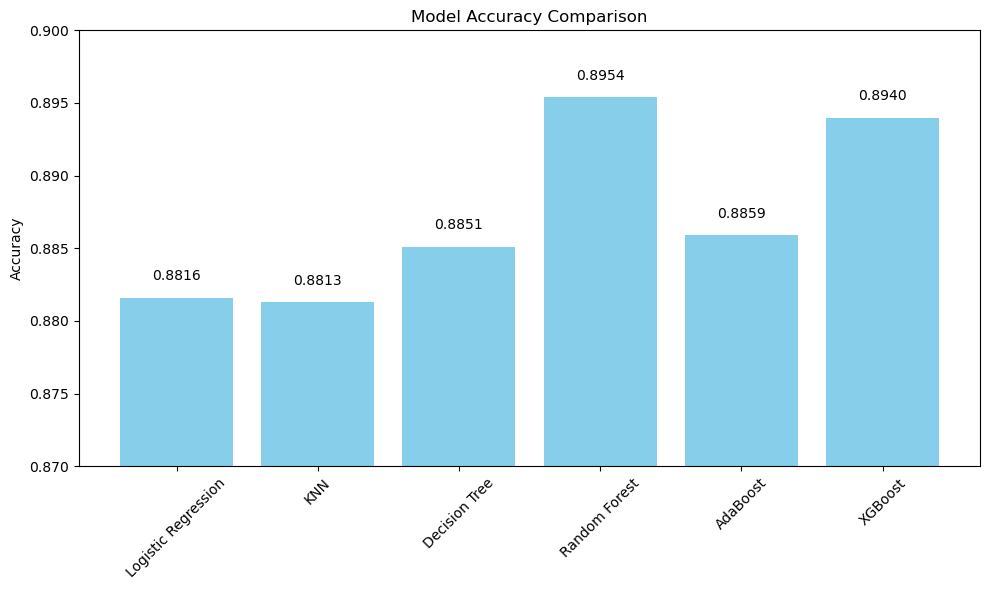

In [46]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
accuracies = [0.8816, 0.8813, 0.8851, 0.8954, 0.8859, 0.8940]

plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.87, 0.90)

# Annotate accuracy values
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.001, f'{acc:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
